**Задача 1.** Использование PCA и t-SNE для визуализации набора данных MNIST. Ниже пример использования PCA для целого набора данных и t-SNE для его небольшой части. От Вас требуется всего лишь повторить последний пример, но для большего набора данных.

PCA -  это метод машинного обучения, который используется для снижения размерности данных. Он используется для выявления главных компонент (основных направлений) в данных, которые соответствуют наибольшим дисперсиям.

t-SNE - (t-распределенное стохастическое встраивание соседей) — это неконтролируемый метод нелинейного уменьшения размерности для исследования данных и визуализации многомерных данных. Нелинейное уменьшение размерности означает, что алгоритм позволяет разделить данные, которые невозможно разделить прямой линией.

Основное отличие между PCA и tSNE заключается в том, что PCA используется для выявления главных компонент (основных направлений) в данных, которые соответствуют наибольшим дисперсиям. Это означает, что PCA может использоваться для снижения размерности данных, удаляя из них некоторые из наиболее важных компонент.

С другой стороны, tSNE используется для трансформации данных в двумерное пространство, где расстояние между точками соответствует их расстоянию в исходном пространстве. Это позволяет сохранять структуру данных в двумерном пространстве и улучшает визуализацию данных.

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Загрузим набор MNIST. Поскольку мы собираемся использовать PCA для визуализации, оставим только две главные компоненты.

In [4]:
mnist = fetch_openml('mnist_784', cache=False)
mnist.data.shape

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)

In [5]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')
X /= 255.0
X.min(), X.max()

(pixel1      0.0
 pixel2      0.0
 pixel3      0.0
 pixel4      0.0
 pixel5      0.0
            ... 
 pixel780    0.0
 pixel781    0.0
 pixel782    0.0
 pixel783    0.0
 pixel784    0.0
 Length: 784, dtype: float64,
 pixel1      0.000000
 pixel2      0.000000
 pixel3      0.000000
 pixel4      0.000000
 pixel5      0.000000
               ...   
 pixel780    0.243137
 pixel781    0.000000
 pixel782    0.000000
 pixel783    0.000000
 pixel784    0.000000
 Length: 784, dtype: float64)

In [6]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(X)

print("Новая размерность = ", pca_data.shape)
pca_data = np.vstack((pca_data.T, y)).T

Новая размерность =  (70000, 2)


Построим данные.

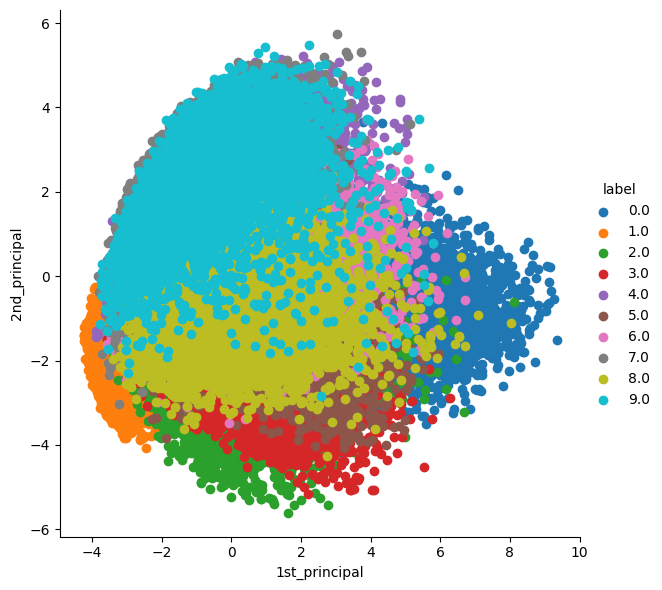

,1st_principal,2nd_principal,label
0,0.479437,-1.240181,5.0
1,3.962699,-1.137178,0.0
2,-0.231338,1.543934,4.0
3,-3.125349,-2.382055,1.0
4,-1.534612,2.861944,9.0


In [7]:
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))

sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()
pca_df.head()

Теперь используем t-SNE для этой же цели. Поскольку t-SNE очень вычислительно затратный метод, разобъем наш набор из 70000 изображений на наборы поменьше. Это можно сделать например с помощью двух вызовов функции train_test_split.

In [8]:
X1, Xtemp, y1, ytemp = train_test_split(X, y, test_size=0.25, random_state=42)
X2, X3, y2, y3 = train_test_split(Xtemp, ytemp, test_size=0.1, random_state=42)

In [9]:
X1.shape, X2.shape, X3.shape

((52500, 784), (15750, 784), (1750, 784))

Далее я возьму самый маленький набор, а Вы позже возьмите набор побольше, чтобы успеть выпить кофе.

In [10]:
data = X1
labels = y1

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data)
tsne_data = np.vstack((tsne_data.T, labels)).T

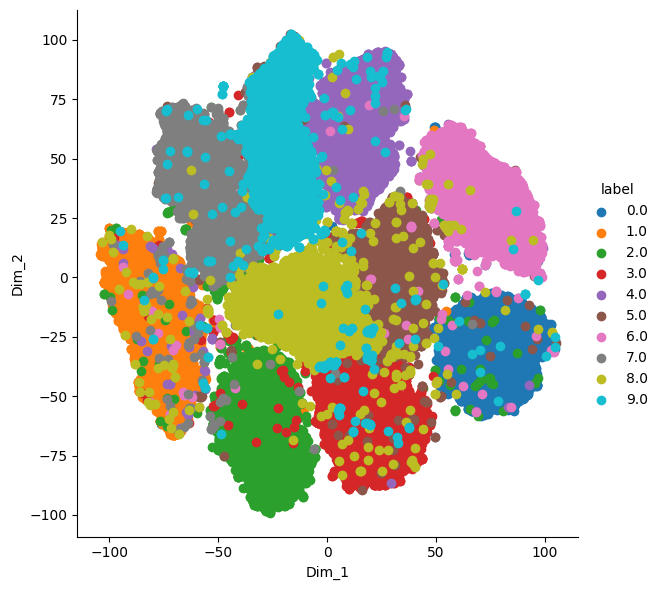

In [11]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

Неплохо в сравнении с PCA даже для такого небольшого набора, а если взять больше точек, то результат того стоит.

**Задача 2.**
Определите номер варианта - найдите число букв в Вашей фамилии, поделите его на 4, возьмите остаток от деления и прибавьте 1.

Подрядова - 9 букв, 9 % 4 + 1 = 2

Пример:

Иванов - 6 букв, 6%4+1=2+1=3.

Изучите встроенные в sklearn игрушечные датасеты.
https://scikit-learn.org/stable/datasets/index.html

    1) Boston house prices dataset

    2) Diabetes dataset

    3) Wine recognition dataset

    4) Breast cancer wisconsin (diagnostic) dataset

Для датасета, согласно своему варианту, сделайте следующее:

1) Загрузите его.

2) Используйте 3 любых изученных нами метода машинного обучения для решения задачи регрессии/классификации Ваших данных.

3) Используйте изученные методы (решетчатый поиск, перекрестную проверку) для поиска наилучших параметров Ваших моделей.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_diabetes

# Загрузка датасета
diabetes = load_diabetes()

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

# Метод линейной регрессии
cv = [2,3,4,5,6,7,8,9,10]
ts = [0.2, 0.3, 0.4, 0.5, 0.6]


for i in ts:
  for j in cv:
    print(f"cross validation = {j} test_size = {i}")
    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size= i, random_state=42)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
  #  print("Accuracy for Linear Regression:", accuracy_score(y_test, y_pred_lr))
    scores_lr = cross_val_score(lr, diabetes.data, diabetes.target, cv=j)
    print("Accuracy for Linear Regression(CV):", scores_lr.mean())





cross validation = 2 test_size = 0.2
Accuracy for Linear Regression(CV): 0.4924394855681692
cross validation = 3 test_size = 0.2
Accuracy for Linear Regression(CV): 0.4887021298035315
cross validation = 4 test_size = 0.2
Accuracy for Linear Regression(CV): 0.4846079075127145
cross validation = 5 test_size = 0.2
Accuracy for Linear Regression(CV): 0.48231643590864215
cross validation = 6 test_size = 0.2
Accuracy for Linear Regression(CV): 0.4797786512010009
cross validation = 7 test_size = 0.2
Accuracy for Linear Regression(CV): 0.4763065740713935
cross validation = 8 test_size = 0.2
Accuracy for Linear Regression(CV): 0.4577968110228684
cross validation = 9 test_size = 0.2
Accuracy for Linear Regression(CV): 0.4633155509766136
cross validation = 10 test_size = 0.2
Accuracy for Linear Regression(CV): 0.4619602420450601
cross validation = 2 test_size = 0.3
Accuracy for Linear Regression(CV): 0.4924394855681692
cross validation = 3 test_size = 0.3
Accuracy for Linear Regression(CV): 0.488

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Метод логистической регрессии
ts = [0.1, 0.2, 0.3, 0.4]
cv = [2,3,4,5,6]


for i in ts:
  for j in cv:
    print(f"cross validation = {j} test_size = {i}")

    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size= i, random_state=42)
    # создание объекта логистической регрессии
    model = LogisticRegression()
    model.fit(X_train, y_train)
    # выполнение кросс-валидации
    y_pred_lr = model.predict(X_test)

    scores_lr = cross_val_score(model, diabetes.data, diabetes.target, cv=j)
    print("Accuracy for Logistic Regression(CV):", scores_lr.mean())



cross validation = 2 test_size = 0.1
Accuracy for Logistic Regression(CV): 0.0248868778280543
cross validation = 3 test_size = 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Accuracy for Logistic Regression(CV): 0.020377520377520376
cross validation = 4 test_size = 0.1
Accuracy for Logistic Regression(CV): 0.022686322686322688
cross validation = 5 test_size = 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy for Logistic Regression(CV): 0.01131256384065373
cross validation = 6 test_size = 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


Accuracy for Logistic Regression(CV): 0.01811057632975441
cross validation = 2 test_size = 0.2
Accuracy for Logistic Regression(CV): 0.0248868778280543
cross validation = 3 test_size = 0.2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Accuracy for Logistic Regression(CV): 0.020377520377520376
cross validation = 4 test_size = 0.2
Accuracy for Logistic Regression(CV): 0.022686322686322688
cross validation = 5 test_size = 0.2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy for Logistic Regression(CV): 0.01131256384065373
cross validation = 6 test_size = 0.2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


Accuracy for Logistic Regression(CV): 0.01811057632975441
cross validation = 2 test_size = 0.3
Accuracy for Logistic Regression(CV): 0.0248868778280543
cross validation = 3 test_size = 0.3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Accuracy for Logistic Regression(CV): 0.020377520377520376
cross validation = 4 test_size = 0.3
Accuracy for Logistic Regression(CV): 0.022686322686322688
cross validation = 5 test_size = 0.3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy for Logistic Regression(CV): 0.01131256384065373
cross validation = 6 test_size = 0.3


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


Accuracy for Logistic Regression(CV): 0.01811057632975441
cross validation = 2 test_size = 0.4
Accuracy for Logistic Regression(CV): 0.0248868778280543
cross validation = 3 test_size = 0.4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Accuracy for Logistic Regression(CV): 0.020377520377520376
cross validation = 4 test_size = 0.4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


Accuracy for Logistic Regression(CV): 0.022686322686322688
cross validation = 5 test_size = 0.4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy for Logistic Regression(CV): 0.01131256384065373
cross validation = 6 test_size = 0.4


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


Accuracy for Logistic Regression(CV): 0.01811057632975441


In [23]:
from sklearn.ensemble import GradientBoostingClassifier

# Метод градиентного бустинга и использование решетчатого поиска
md = [1,2,3,4]
ne = [10, 20, 30, 40, 50]
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

for i in md:
  for j in ne:
      print(f"n_estimators = {j} max_depth = {i}")

      gb = GradientBoostingClassifier(n_estimators=j, learning_rate=0.1, max_depth=i)
      gb.fit(X_train,y_train)
      print("Accuracy for Gradient Boosting:", gb.score(X_train, y_train))



n_estimators = 10 max_depth = 1
Accuracy for Gradient Boosting: 0.6657223796033994
n_estimators = 20 max_depth = 1
Accuracy for Gradient Boosting: 0.8016997167138811
n_estimators = 30 max_depth = 1
Accuracy for Gradient Boosting: 0.8781869688385269
n_estimators = 40 max_depth = 1
Accuracy for Gradient Boosting: 0.8696883852691218
n_estimators = 50 max_depth = 1
Accuracy for Gradient Boosting: 0.886685552407932
n_estimators = 10 max_depth = 2
Accuracy for Gradient Boosting: 0.9235127478753541
n_estimators = 20 max_depth = 2
Accuracy for Gradient Boosting: 0.9178470254957507
n_estimators = 30 max_depth = 2
Accuracy for Gradient Boosting: 0.9093484419263456
n_estimators = 40 max_depth = 2
Accuracy for Gradient Boosting: 0.9575070821529745
n_estimators = 50 max_depth = 2
Accuracy for Gradient Boosting: 0.8668555240793201
n_estimators = 10 max_depth = 3
Accuracy for Gradient Boosting: 1.0
n_estimators = 20 max_depth = 3
Accuracy for Gradient Boosting: 1.0
n_estimators = 30 max_depth = 3
Acc